<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/VN_Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [5]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [31]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Money_Data/money_train', target_size=(100,100), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/Money_Data/money_test', target_size=(100,100), class_mode='categorical')


Found 2375 images belonging to 11 classes.
Found 375 images belonging to 11 classes.


In [32]:
## in ra ten cac lop va thu tu cua cac lop do 
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'1.000': 0, '10.000': 1, '100.000': 2, '2.000': 3, '20.000': 4, '200': 5, '200.000': 6, '5.000': 7, '50.000': 8, '500': 9, '500.000': 10}
test_index: {'1.000': 0, '10.000': 1, '100.000': 2, '2.000': 3, '20.000': 4, '200': 5, '200.000': 6, '5.000': 7, '50.000': 8, '500': 9, '500.000': 10}


In [33]:
model= Sequential()
## lop CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(100,100,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =11

In [34]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
##lop hidden2
model.add(Dense(256,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
# lop output
model.add(Dense(classes, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [36]:
data=model.fit(train_data,epochs=30,batch_size=128,verbose=1, 
                  validation_data=test_data)

Epoch 1/30
75/75 [==============================] - 10s 116ms/step - loss: 1.2793 - accuracy: 0.5128 - val_loss: 1.5795 - val_accuracy: 0.4160
Epoch 2/30
75/75 [==============================] - 8s 105ms/step - loss: 0.4248 - accuracy: 0.8307 - val_loss: 1.0656 - val_accuracy: 0.6693
Epoch 3/30
75/75 [==============================] - 8s 106ms/step - loss: 0.2595 - accuracy: 0.8943 - val_loss: 1.3917 - val_accuracy: 0.6240
Epoch 4/30
75/75 [==============================] - 8s 110ms/step - loss: 0.1291 - accuracy: 0.9516 - val_loss: 1.9666 - val_accuracy: 0.6000
Epoch 5/30
75/75 [==============================] - 8s 101ms/step - loss: 0.0918 - accuracy: 0.9676 - val_loss: 1.2873 - val_accuracy: 0.7440
Epoch 6/30
75/75 [==============================] - 8s 105ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 1.5168 - val_accuracy: 0.7200
Epoch 7/30
75/75 [==============================] - 8s 110ms/step - loss: 0.0453 - accuracy: 0.9899 - val_loss: 1.7860 - val_accuracy: 0.5680
Epoch

In [37]:
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 1.6919411791604944e-05
accuracy 1.0


<ipython-input-38-44b5a1f0455e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


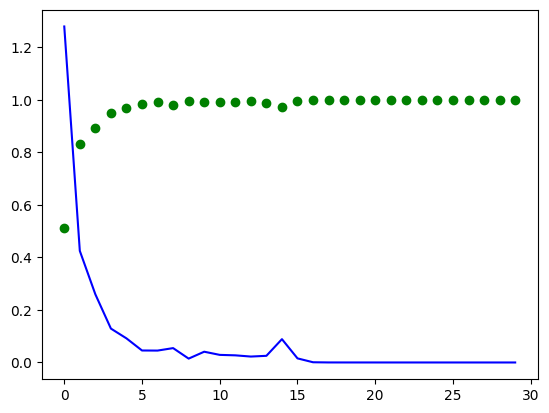

In [38]:
model.save('/content/drive/MyDrive/MyPicture/Money_Data/model_money.h5')
accuracy =data.history['accuracy']
loss = data.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 77ms/step
Predicted:  5.000


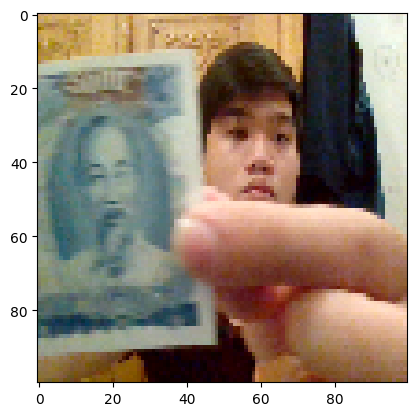

In [44]:
name_foods= ['1.000','10.000','100.000','2.000','20.000','200','200.000','5.000','50.000','500','500.000']
filePath = '/content/drive/MyDrive/Money_Data/5k.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(100,100))
arrayImage = img_to_array(testImage).reshape(1,100,100,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)